### Task 2.1 

In [ ]:
import cv2
import glob
from IPython.display import Image, display

path_images = ('/content/set/*.jpg')
img_number = 1

for file in glob.glob(path_images):
  #print(file)
  img = cv2.imread(file,1)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  cv2.imwrite("/content/resultgray/gray"+str(img_number)+".jpg", img_gray)
  cv2.imwrite("/content/resultrgb/rgb"+str(img_number)+".jpg", img_rgb)
  img_number += 1

images_gs = [cv2.imread(image) for image in glob.glob('/content/resultgray/*.jpg')]
images_rgb = [cv2.imread(image) for image in glob.glob('/content/resultrgb/*.jpg')]

row = 3
col = 3

for i in range(0, len(images_gs), row*col):
    fig = plt.figure(figsize = (7,8))
    for j in range(0, row*col):
        fig.add_subplot(row, col, j+1)
        plt.imshow(images_gs[i+j])
    plt.show()

row = 3
col = 3

for i in range(0, len(images_rgb), row*col):
    fig = plt.figure(figsize = (7,8))
    for j in range(0, row*col):
        fig.add_subplot(row, col, j+1)
        plt.imshow(images_rgb[i+j])
    plt.show()





#  for imageName in glob.glob('/content/resultgray/*.jpg'):
#    display(Image(filename=imageName))
#    print(imageName)

#  for imageName in glob.glob('/content/resultrgb/*.jpg'):
#    display(Image(filename=imageName))
#    print(imageName)

### Task 2.2

Enter a fully qualified path for an image: /content/4.jpg


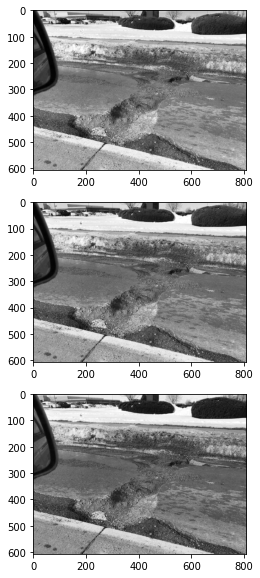

In [87]:
from PIL import Image

imagepath = input("Enter a fully qualified path for an image: ")
im = Image.open(imagepath)

im1 = Image.Image.split(im)

fig, ax = plt.subplots(3,1,figsize=(10,10))
ax[0].imshow(im1[0], cmap = 'gray')
ax[1].imshow(im1[1], cmap = 'gray')
ax[2].imshow(im1[2], cmap = 'gray')

### Task 2.4

**Piece of code to convolve an image and a kernel from scratch**

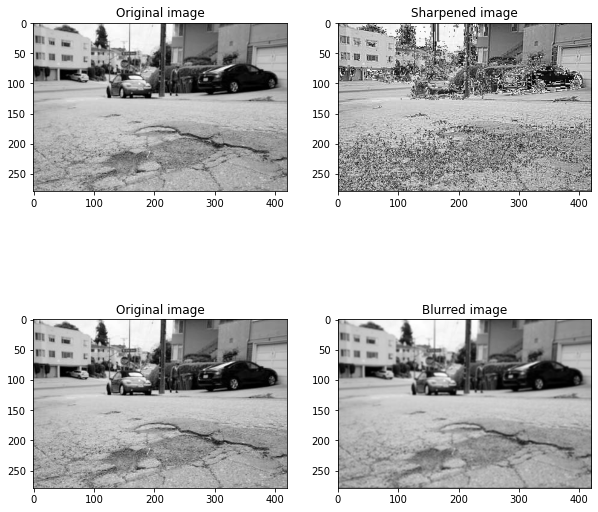

In [33]:
import os
import cv2
import numpy as np

IMAGE_PATH = 'output_images/'

def load_image(image_path):
    
    # Creating an Image directory to save our plots
    if not os.path.exists(IMAGE_PATH):
        os.makedirs(IMAGE_PATH)
    coloured_image = cv2.imread('/content/7.jpg')
    
    # Converting from BGR to Grayscale format
    grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    return grey_image


def convolve2d(image, kernel):

    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding in order to preserve the edges of the image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

input_image = load_image('input_image.jpg')

# kernel to be used to sharpen an image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d(input_image, kernel=KERNEL)
cv2.imwrite(IMAGE_PATH + 'sharpened_image.jpg', image_sharpen)

# kernel to be used to blur an image
image_blur = convolve2d(input_image, kernel=np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0)
cv2.imwrite(IMAGE_PATH + 'blurred_image.jpg', image_blur)


fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].imshow(image, cmap = 'gray')
ax[0,1].imshow(image_sharpen, cmap = 'gray')
ax[0,0].title.set_text('Original image')
ax[0,1].title.set_text('Sharpened image')
ax[1,0].imshow(image, cmap = 'gray')
ax[1,1].imshow(image_blur, cmap = 'gray')
ax[1,0].title.set_text('Original image')
ax[1,1].title.set_text('Blurred image')

**Using in-built libraries for convolution and comparison**

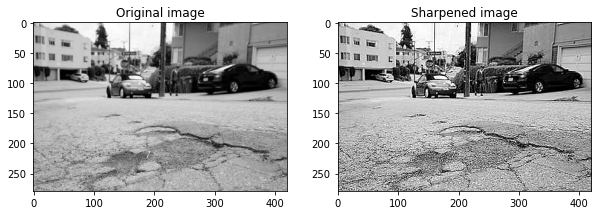

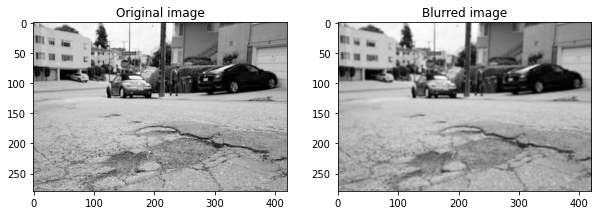

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/7.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# kernel for sharpening an image
kernel1 = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# kernel for blurring an image
kernel2 = np.ones((3, 3), np.float32) / 9

# filter2D() function gives the convolution of the input array and kernel
img = cv2.filter2D(image, -1, kernel1)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(image, cmap = 'gray')
ax[1].imshow(img, cmap = 'gray')
ax[0].title.set_text('Original image')
ax[1].title.set_text('Sharpened image')


img = cv2.filter2D(image, -1, kernel2)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(image, cmap = 'gray')
ax[1].imshow(img, cmap = 'gray')
ax[0].title.set_text('Original image')
ax[1].title.set_text('Blurred image')